In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

import sklearn
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm

# Neural network libraries
import torch
import torchvision
import torch.utils.data as data_utils
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import random
import pickle

In [5]:
temp = np.load('/usr/workspace/UCM_2021/challenge_setup/data_and_information/asteroid_difference_images_0.npz')['data']

(3080, 3072)


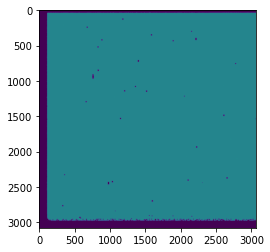

In [6]:
i=8
img=temp[i+1]
print(np.shape(img))
plt.imshow(img)
plt.savefig("./Figures/Asteroids.png",dpi=200)


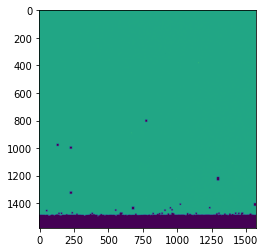

In [7]:
img=temp[i+2]
img=img[1500:,1500:]
plt.imshow(img)


In [8]:
sample_information_0 = np.load("/usr/workspace/UCM_2021/challenge_setup/data_and_information/asteroid_injected_information_0.npz",allow_pickle=True)

In [10]:
sample_information_0['data'][1]

ModuleNotFoundError: No module named 'galsim'

In [12]:
sample_images_0=temp

In [13]:
np.shape(sample_images_0)

(100, 3080, 3072)

In [15]:
asteroid=[]
j=1
c=0
while j<100:
    print(j)
    for i in range(20):
        img=sample_images_0
        #print(j)
        box_values_ast_0 = sample_information_0['data'][j]['box'][i]
        temp_img_ast=sample_images_0[c][box_values_ast_0.ymin:box_values_ast_0.ymax,box_values_ast_0.xmin:box_values_ast_0.xmax]
        asteroid.append(temp_img_ast)
    j=j+2
    c=c+1

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99


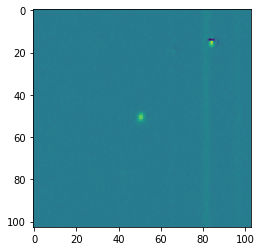

In [17]:
    i=asteroid[11]
    plt.imshow(i)
    plt.savefig("./Figures/Asteroid_Sample_3.png",dpi=200)


In [18]:
classes=["Asteroid","Non-Asteroid"]
Vectorized_Classes=[1,0]

In [19]:
fixed_size=[]
for i in asteroid:
    fixed_size.append(i[0:100,0:100])


In [20]:
np.shape(fixed_size)

(1000, 100, 100)

In [21]:
np.shape(fixed_size[1])

(100, 100)

In [22]:
j=1
c=0
non_asteroid=[]
total=0
while j<39:
    print(j)
    if(total==35000):
        break
    for i in range(20):
        temp_img_ast=sample_images_0[c]
        box_values_ast_0 = sample_information_0['data'][j]['box'][i]
        for x in range(290):
            for y in range(290):
                for box in range (20):
                    if(x<box_values_ast_0.xmin or x >box_values_ast_0.xmax and y <box_values_ast_0.ymin and y >box_values_ast_0.ymax):
                        break
                    if(box==19):
                        y_min=y*10
                        y_max=y_min+100
                        non_asteroid.append(temp_img_ast[(x)*10:(x+10)*10,y_min:y_max])
                        total=total+1
    j=j+2
    c=c+1
                        


1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37


In [23]:
np.shape(non_asteroid)


(741530, 100, 100)

In [24]:
temp_non_asteroid=random.sample(non_asteroid,1500)


In [25]:
np.shape(fixed_size)

(1000, 100, 100)

In [26]:
np.shape(temp_non_asteroid)

(1500, 100, 100)

In [204]:
x=[]
y=[]
for i in fixed_size:
    x.append(i)

for i in temp_non_asteroid:
    x.append(i)
x.append(temp_non_asteroid)
for i in fixed_size:
    y.append(1)
for i in temp_non_asteroid:
    y.append(0)

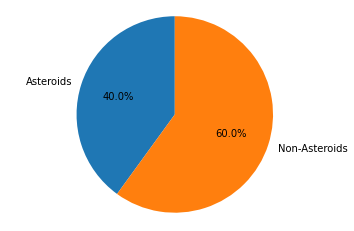

In [205]:
labels="Asteroids","Non-Asteroids"
sizes = [len(fixed_size),len(temp_non_asteroid)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig1.savefig("./Figures/Asteroid_PieChart.png",dpi=200)


In [206]:
print(len(fixed_size))
print(len(temp_non_asteroid))


1000
1500


non_asteroid


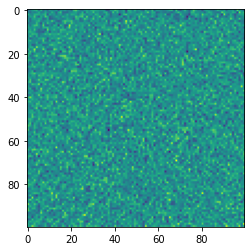

In [207]:
temp_value_asteroid_for_printing=1501
plt.imshow(x[temp_value_asteroid_for_printing])
if(y[temp_value_asteroid_for_printing]==1):
    print("asteroid")
else:
    print("non_asteroid")
plt.savefig("./Figures/Non_Asteroid_Samples4.png",dpi=200)

In [208]:
class Asteroid(Dataset):
    def __init__(self,X,Y):
        self.X1=X
        self.Y1=Y
    def __getitem__(self, idx):
        #idx=idx.item()
        tempX=self.X1[idx]
        tempX=torch.tensor(tempX)
        tempX=tempX.double()
        tempY=self.Y1[idx]
        if(tempY==1):
            tempY=torch.tensor([0,1])  
        else:
            tempY=torch.tensor([1,0])
            #(.2,.8)-[0]
            #(.2,.8)[0 1] [1 0]
            #
            #
        tempY=tempY.double()
        return(tempX,tempY)
       #returns batch(x,y)
    def __len__(self):
        return (len(self.X1))
        #Length


In [209]:
DataSet=Asteroid(x,y)

In [210]:
#SizeOfDataSet=len(DataSet)

In [211]:
SizeOfDataSet

2501

In [212]:
trainSize=int(SizeOfDataSet*.7)
testSize=SizeOfDataSet-trainSize


In [213]:
trainSize+testSize

2501

In [214]:
train_dataset,val_dataset=torch.utils.data.random_split(DataSet,[int(trainSize),int(testSize)])

In [215]:
class Astroid_Classifer(torch.nn.Module):
    """
    Simple model which takes 32x32 inputs and produces
    score values for each of 10 classes for each element.
    Model adapted from:
    https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
    """
    def __init__(self):
        super().__init__()
        # Features
        self.conv1=nn.Conv2d(1,2,5)
        self.pool1=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(2,4,5)
        self.conv3=nn.Conv2d(32,64,5)
        self.fc1=nn.Linear(15488,130)#288/130
        self.fc2=nn.Linear(1936,80)#130/80
        self.fc3=nn.Linear(80,30)#80/30
        self.fc4=nn.Linear(30,2)#30/2

    def forward(self, x):
        #Batch
        """
        Pass one batch of image data through the model.
        Return batch of score values corresponding to each class.
        Input size: (batch_size, 1, 32, 32)
        Output size: (batch_size, 10)
        """
        x=self.pool1(F.relu(self.conv1(x)))
        x=self.pool1(F.relu(self.conv2(x)))
        x=torch.flatten(x,1)
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=(F.softmax(self.fc4(x)))  
        return x

In [216]:
model = Astroid_Classifer()


In [217]:
criterion=nn.MSELoss()
optimzer=optim.Adagrad(model.parameters(),lr=0.001)

In [218]:
accuracy=[]
loss_total=[]

In [219]:
arr=[]
for epoch in range(10):
    running_loss=float(0)
    count=0.0
    acc=0.0
#Batch size, Channels, WIDTH, Height
#1,1,100,100
    print("-------------TRAIN-------------")
    for i, (input_x, label) in enumerate(train_dataset):
        #print(outputs) 
        optimzer.zero_grad()
        input_x=input_x.float()#Conversion x64 tensor to float
        input_x = input_x.unsqueeze(0)
        input_x = input_x.unsqueeze(0)
        input_x.float()
        outputs=model(torch.tensor(input_x))#passes input tensor into model
        #print(outputs)
        count=count+1
        label_tensor=torch.max(label, 0)
        label_tensor=label_tensor[1]
        loss=criterion(outputs.float(),label.float())# [1,0],[1]
        if(torch.max(outputs, 1)[1]==label_tensor):
            acc=acc+1
            
        loss.backward()
        optimzer.step()
        running_loss+=loss.item()
        if i % 200==199:
            print('[%d,%5d] | loss: %.3f | accuracy: %.3f'%(epoch+1,i+1,running_loss/200,acc/count))
            accuracy.append(acc/count)
            loss_total.append(running_loss/count)
            count=0.0
            acc=0.0
            running_loss=0
            

-------------TRAIN-------------


/g/g92/binod/.conda/envs/group2/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
/g/g92/binod/.conda/envs/group2/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[1,  200] | loss: 0.159 | accuracy: 0.810
-------------TRAIN-------------
[2,  200] | loss: 0.071 | accuracy: 0.925
-------------TRAIN-------------
[3,  200] | loss: 0.072 | accuracy: 0.935
-------------TRAIN-------------
[4,  200] | loss: 0.070 | accuracy: 0.940
-------------TRAIN-------------
[5,  200] | loss: 0.063 | accuracy: 0.945
-------------TRAIN-------------
[6,  200] | loss: 0.061 | accuracy: 0.945
-------------TRAIN-------------
[7,  200] | loss: 0.060 | accuracy: 0.945
-------------TRAIN-------------
[8,  200] | loss: 0.059 | accuracy: 0.945
-------------TRAIN-------------
[9,  200] | loss: 0.058 | accuracy: 0.945
-------------TRAIN-------------
[10,  200] | loss: 0.058 | accuracy: 0.945


In [142]:
weight=model.state_dict()
path="Asteroid.pth.pth"
torch.save(weight, path)

tensor(0.0006, grad_fn=<MseLossBackward>)
